In [1]:
!pip install mglearn

     |████████████████████████████████| 542kB 6.7MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=2b6873f0c957f5cbd714caa1bcd54b904fca028e717d89df6a046bd031ec5ca0
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [2]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()
X = cancer.data
Y = cancer.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [4]:
cancer_gradient_boosting_classifier = GradientBoostingClassifier(random_state=0,learning_rate=0.1, n_estimators=100, max_depth=1)
cancer_gradient_boosting_classifier.fit(X_train, Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [5]:
print("train accuracy: {}".format(cancer_gradient_boosting_classifier.score(X_train, Y_train)))
print("test accuracy: {}".format(cancer_gradient_boosting_classifier.score(X_test, Y_test)))

train accuracy: 0.9906103286384976
test accuracy: 0.972027972027972


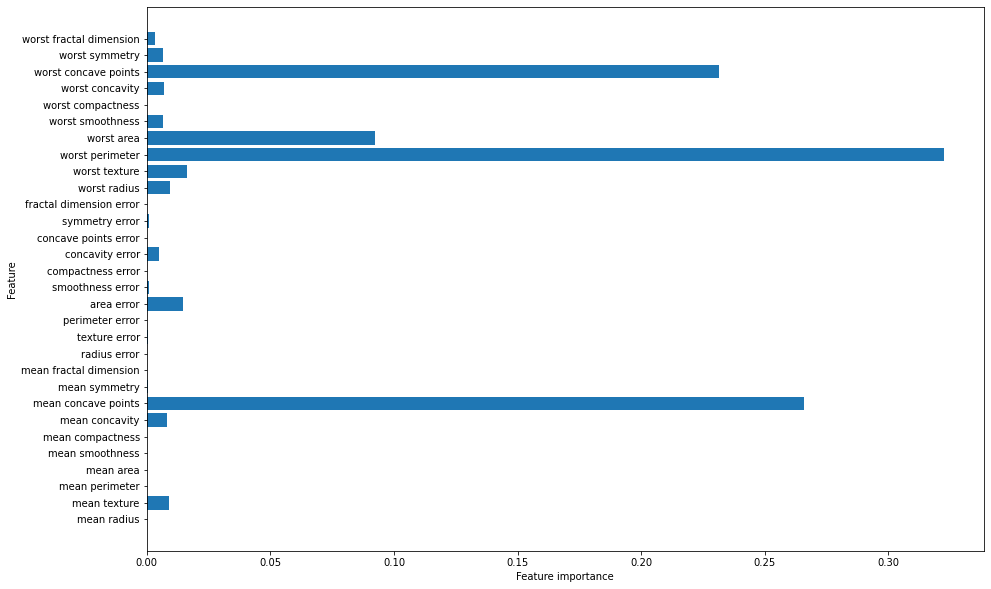

In [6]:
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.figure(figsize=(15,10))
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
  plt.show()
plot_feature_importances_cancer(cancer_gradient_boosting_classifier)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
cv = KFold(n_splits=3, shuffle=True, random_state=42) #k分割交差検証
cv_params = {"learning_rate": [i / 1000 for i in range(7, 10, 1)],
             "n_estimators": list(range(150, 200, 1)),
             "max_depth": list(range(1, 4, 1))}
gridcv = GridSearchCV(cancer_gradient_boosting_classifier, param_grid=cv_params, cv=cv,
                      scoring="accuracy", n_jobs=-1)
gridcv.fit(X, Y) #グリッドサーチ実行
best_params = gridcv.best_params_
best_score = gridcv.best_score_
print(f'best parameter {best_params}\nscore {best_score}')

In [ ]:
cancer_gradient_boosting_classifier = GradientBoostingClassifier(random_state=0, learning_rate=0.08, n_estimators=180, max_depth=1)
cancer_gradient_boosting_classifier.fit(X_train, Y_train)
print("train accuracy: {}".format(cancer_gradient_boosting_classifier.score(X_train, Y_train)))
print("test accuracy: {}".format(cancer_gradient_boosting_classifier.score(X_test, Y_test)))
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.figure(figsize=(15,10))
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
  plt.show()
plot_feature_importances_cancer(cancer_gradient_boosting_classifier)

In [ ]:
gbc = GradientBoostingClassifier(random_state=0, max_depth=1)
gbc.fit(X_train, Y_train)
plot_feature_importances_cancer(gbc)